# <p style="text-align: center;"> <b> Đồ án Quan hóa Dữ liệu </b> </p>


---

# Import Package

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/hotel_bookings.csv")

## Data Understanding

### 1. Đếm số dòng và số cột

In [3]:
nrows, ncols = df.shape

print(f"Số dòng của tập dữ liệu: {nrows}")
print(f"Số cột của tập dữ liệu: {ncols}")

Số dòng của tập dữ liệu: 119390
Số cột của tập dữ liệu: 32


* hotel: tên khách sạn
* is_canceled: có hủy hay không
* lead_time: thời gian lead

...

* reservation_status: trạng thái đặt chỗ
* reservation_status_date: ngày trạng thái đặt chỗ

In [4]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
20376,Resort Hotel,0,0,2016,January,5,25,1,1,1,...,No Deposit,240.0,NaN,0,Transient,40.00,0,0,Check-Out,1/27/2016
72122,City Hotel,1,182,2017,July,29,21,2,2,2,...,No Deposit,9.0,NaN,0,Transient,106.65,0,0,Canceled,2/24/2017
5274,Resort Hotel,0,222,2016,April,17,23,2,5,2,...,No Deposit,156.0,NaN,0,Transient,41.33,0,2,Check-Out,4/30/2016
49108,City Hotel,1,105,2016,April,15,6,0,1,2,...,Non Refund,12.0,NaN,0,Transient,75.00,0,0,Canceled,1/18/2016
114800,City Hotel,0,396,2017,June,26,25,2,0,2,...,No Deposit,6.0,NaN,0,Transient-Party,122.40,0,1,Check-Out,6/27/2017


In [5]:
missing_rates = df.isna().sum() / len(df)
missing_rates

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [6]:
duplicate_rate = df.duplicated().sum() / len(df)
print(f"Tỷ lệ dòng dữ liệu bị trùng lặp là: {round(duplicate_rate, 4) * 100}%")

# Loại bỏ các dòng trùng lặp
df = df.drop_duplicates()

Tỷ lệ dòng dữ liệu bị trùng lặp là: 26.8%


In [7]:
df = df.fillna(-1)


## EDA 1D 

In [8]:
cate_list = list(df.dtypes[df.dtypes == 'object'].index)

In [9]:
num_list = list(df.dtypes[df.dtypes != 'object'].index)

## num 

In [10]:
df[num_list[0]].value_counts(normalize=True)

is_canceled
0    0.725102
1    0.274898
Name: proportion, dtype: float64

In [11]:
df[num_list[1]].value_counts(normalize=True)

lead_time
0      0.068401
1      0.036798
2      0.022049
3      0.019497
4      0.017964
         ...   
410    0.000011
411    0.000011
371    0.000011
532    0.000011
463    0.000011
Name: proportion, Length: 479, dtype: float64

In [12]:
pd.options.display.float_format = '{:,.6f}'.format
percentiles = [0.01] + [0.05*x for x in range(1, 20)] + [0.99]

In [13]:
df[num_list[1]].describe(percentiles=percentiles)

count   87,396.000000
mean        79.891368
std         86.052325
min          0.000000
1%           0.000000
5%           0.000000
10%          1.000000
15%          4.000000
20%          7.000000
25%         11.000000
30%         17.000000
35%         23.000000
40%         31.000000
45%         39.000000
50%         49.000000
55%         61.000000
60%         73.000000
65%         88.000000
70%        105.000000
75%        125.000000
80%        148.000000
85%        172.000000
90%        204.000000
95%        256.000000
99%        347.000000
max        737.000000
Name: lead_time, dtype: float64

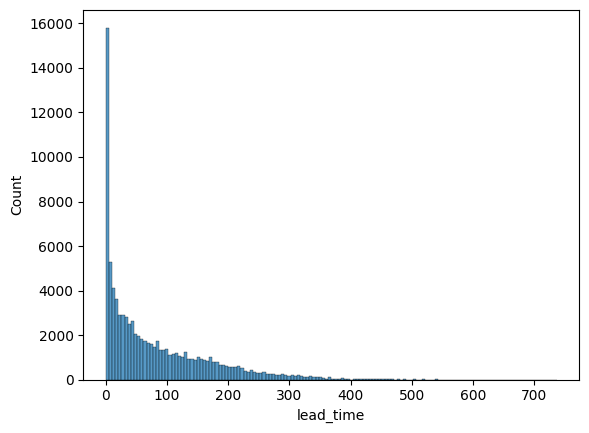

In [14]:
ax = sns.histplot(df[num_list[1]])

## cate 

In [15]:
df[cate_list[0]].value_counts(normalize=True)

hotel
City Hotel     0.611332
Resort Hotel   0.388668
Name: proportion, dtype: float64

In [16]:
df[cate_list[1]].value_counts(normalize=True)

arrival_date_month
August      0.128805
July        0.115074
May         0.095599
April       0.090485
June        0.088848
March       0.085965
October     0.079340
September   0.076548
February    0.069774
December    0.058710
November    0.057154
January     0.053698
Name: proportion, dtype: float64

# EDA 2D 

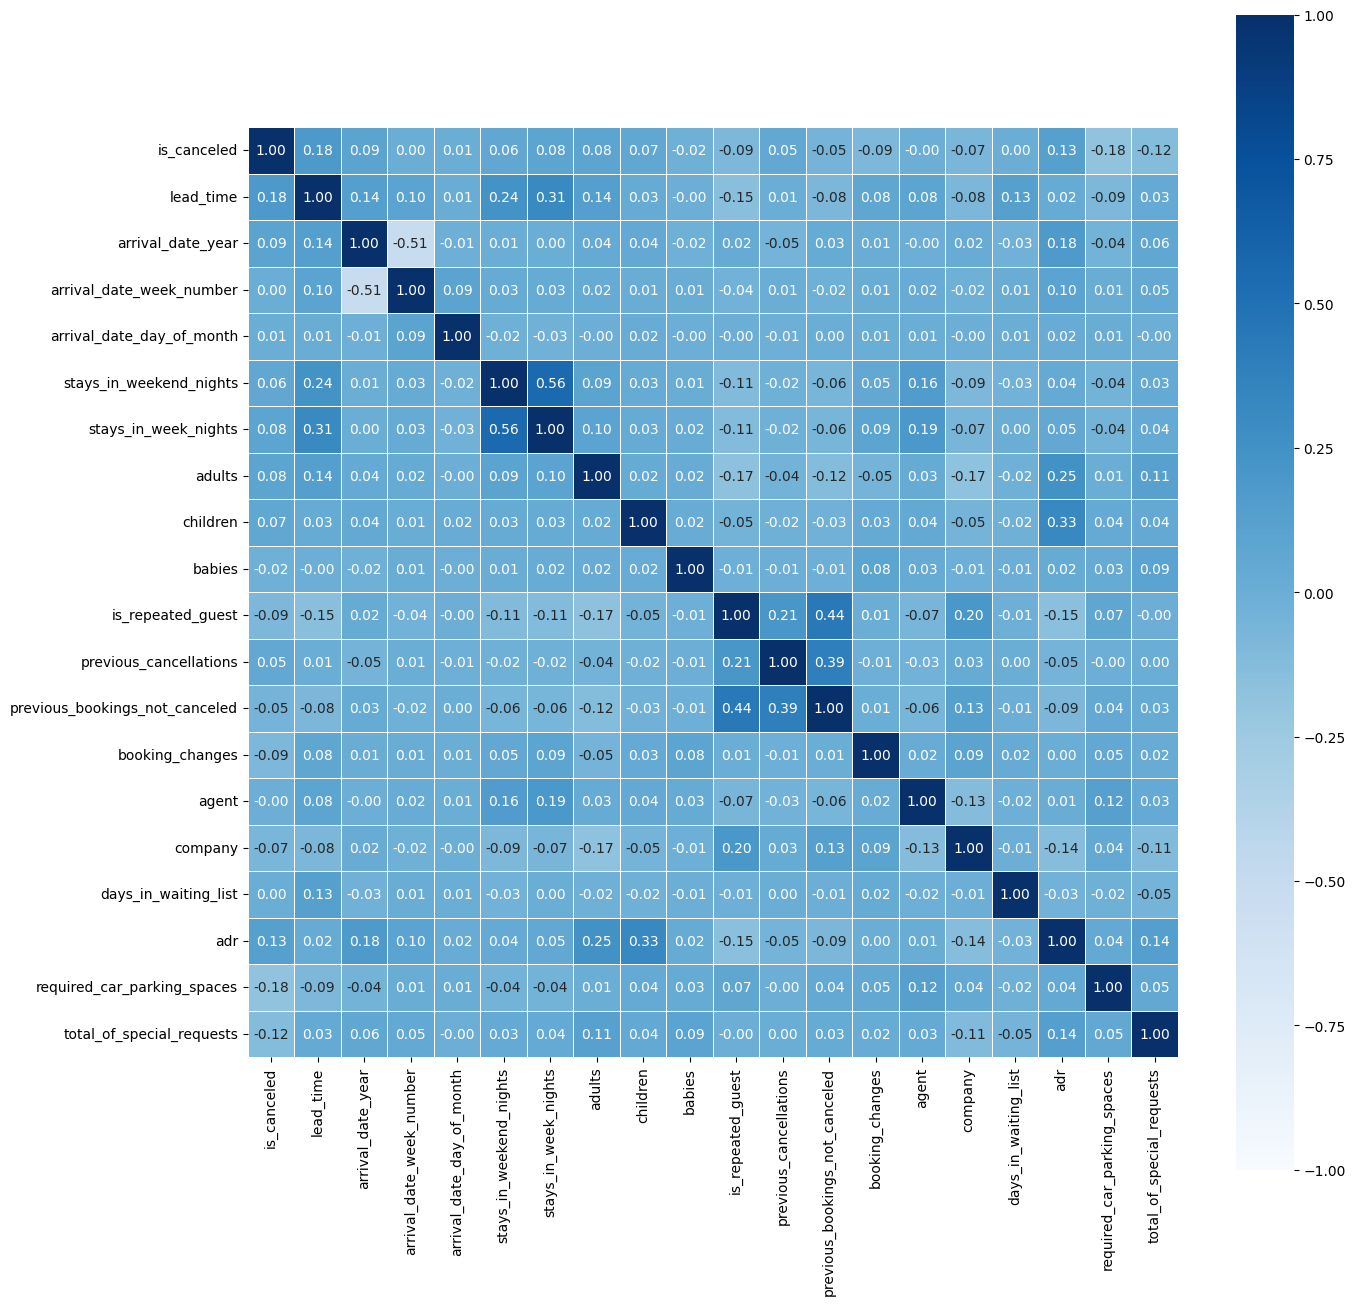

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df[num_list].corr(), annot=True, fmt=".2f", linewidths=.5, square = True, cmap="Blues", vmin=-1, vmax=1)


In [18]:
num_list[12]

'previous_bookings_not_canceled'

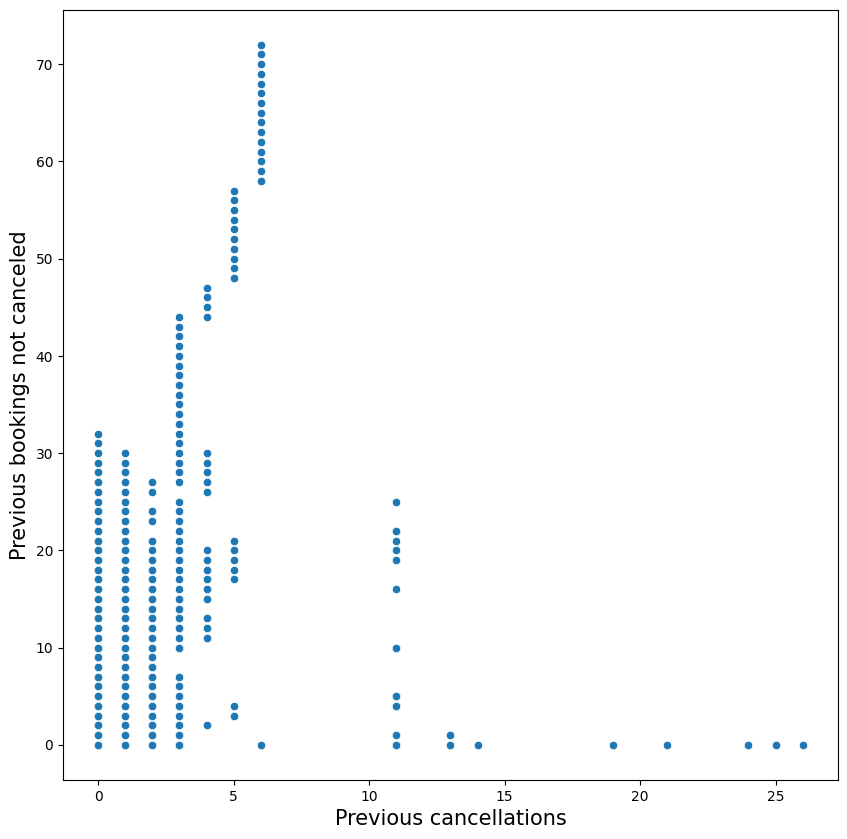

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=df, x="previous_cancellations", y="previous_bookings_not_canceled")
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

In [20]:
df.groupby([cate_list[0]]).agg({num_list[2]: ['min', 'mean', 'std', 'max']})

arrival_date_year                            
                           min         mean      std   max
hotel                                                     
City Hotel                2015 2,016.253968 0.659292  2017
Resort Hotel              2015 2,016.141604 0.720948  2017

In [21]:
df.groupby([cate_list[0], cate_list[1]]).agg({cate_list[2]: 'count'})/len(df)

meal
hotel        arrival_date_month         
City Hotel   April              0.058126
             August             0.075415
             December           0.034487
             February           0.041249
             January            0.031237
             July               0.065724
             June               0.057268
             March              0.055563
             May                0.061936
             November           0.033663
             October            0.048149
             September          0.048515
Resort Hotel April              0.032358
             August             0.053389
             December           0.024223
             February           0.028525
             January            0.022461
             July               0.049350
             June               0.031580
             March              0.030402
             May                0.033663
             November           0.023491
             October            0.031191
             September          0.028033

In [22]:
df.groupby([cate_list[0], cate_list[2]]).agg({cate_list[2]: 'count'})/len(df)

meal
hotel        meal              
City Hotel   BB        0.471749
             FB        0.000126
             HB        0.031935
             SC        0.107522
Resort Hotel BB        0.306067
             FB        0.003993
             HB        0.072017
             SC        0.000961
             Undefined 0.005630

# EDA 3D 

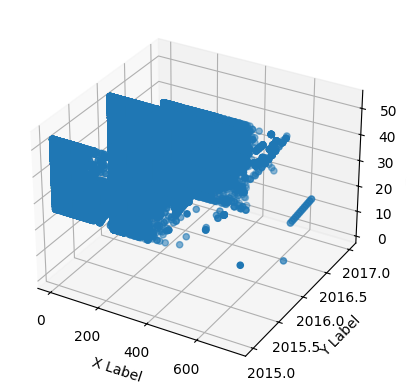

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df[num_list[1]], df[num_list[2]], df[num_list[3]])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

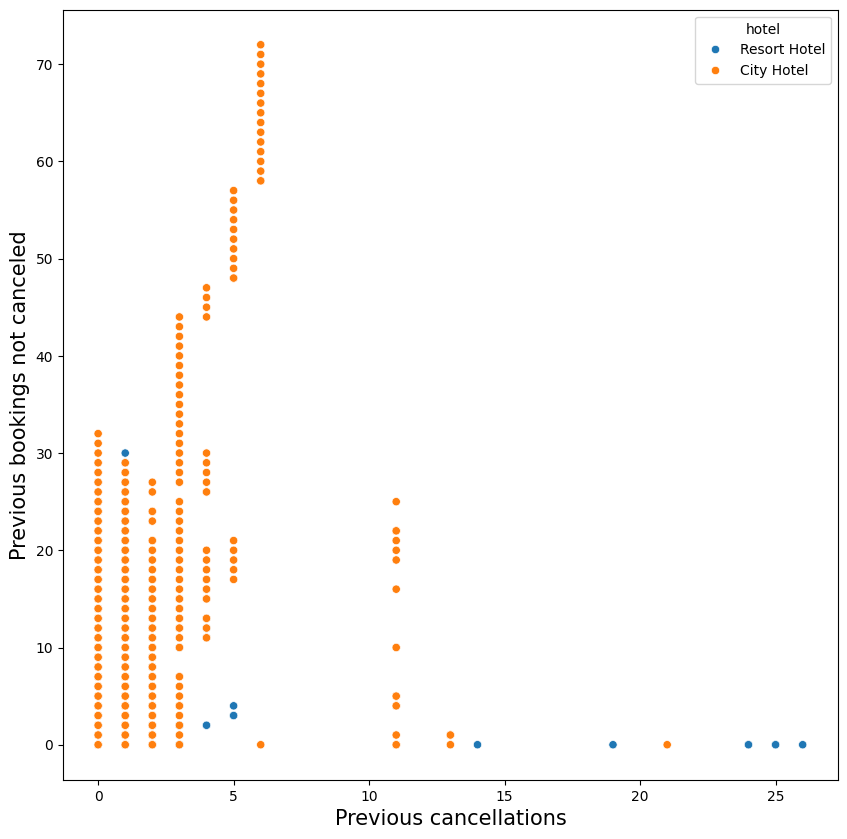

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=df, x="previous_cancellations", y="previous_bookings_not_canceled", hue=cate_list[0])
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

In [25]:
df.groupby(cate_list[0]).agg({num_list[1]: ['min', 'mean', 'std', 'max'], num_list[2]: ['min', 'mean', 'std', 'max']})

lead_time                          arrival_date_year  \
                   min      mean       std  max               min   
hotel                                                               
City Hotel           0 77.678521 82.113381  629              2015   
Resort Hotel         0 83.371938 91.800279  737              2015   

                                          
                     mean      std   max  
hotel                                     
City Hotel   2,016.253968 0.659292  2017  
Resort Hotel 2,016.141604 0.720948  2017

# Insight 

* previous cancellations tương quan thuận với previous bookings not canceled
* Trung bình previous cancellations của City Hotel cao hơn trung bình previous cancellations của Resort Hotel  